In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [4]:
data = pd.read_csv('cars_pricesDataset.csv')
data = data.set_index('ID')

In [5]:
data.shape

(6000, 15)

In [6]:
data.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Color               0
Airbags             0
dtype: int64

In [7]:
data['Manufacturer'].value_counts()

HYUNDAI          1176
TOYOTA           1155
MERCEDES-BENZ     647
FORD              356
BMW               332
CHEVROLET         327
HONDA             295
LEXUS             293
NISSAN            179
VOLKSWAGEN        179
KIA               151
SSANGYONG         142
OPEL              125
MITSUBISHI         95
SUBARU             75
AUDI               73
MAZDA              65
JEEP               49
DODGE              34
DAEWOO             33
FIAT               23
SUZUKI             20
PORSCHE            19
LAND ROVER         15
VAZ                15
RENAULT            11
MINI               10
PEUGEOT             9
JAGUAR              9
VOLVO               8
INFINITI            8
CHRYSLER            6
ACURA               6
SKODA               6
DAIHATSU            5
GAZ                 4
CITROEN             4
UAZ                 4
BUICK               4
GMC                 3
CADILLAC            3
ROVER               3
MERCURY             2
MASERATI            2
SAAB                2
MOSKVICH  

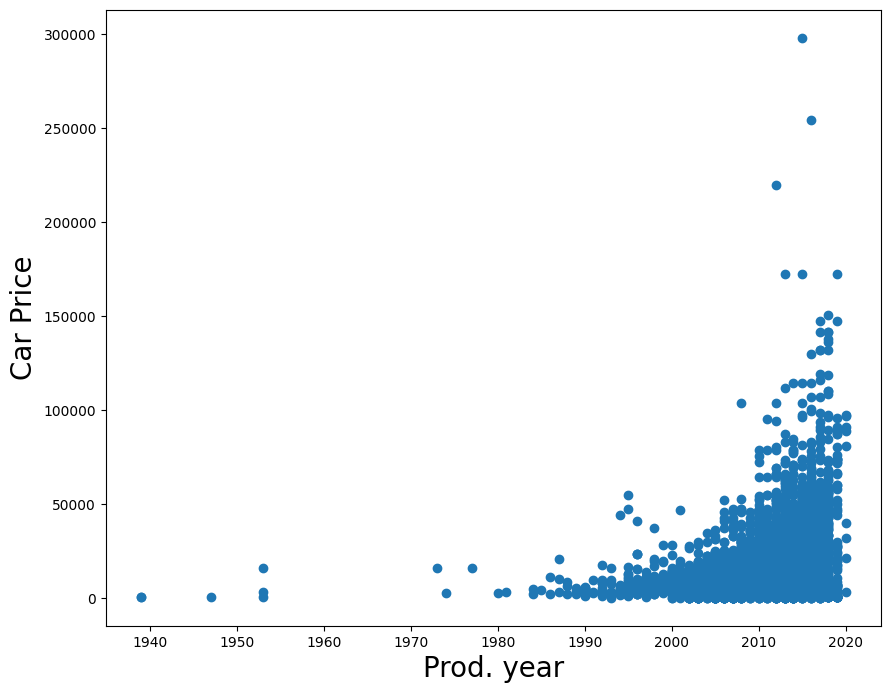

In [8]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Prod. year'], data['Price'])

plt.xlabel('Prod. year', fontsize=20)
plt.ylabel('Car Price', fontsize=20)
plt.show()

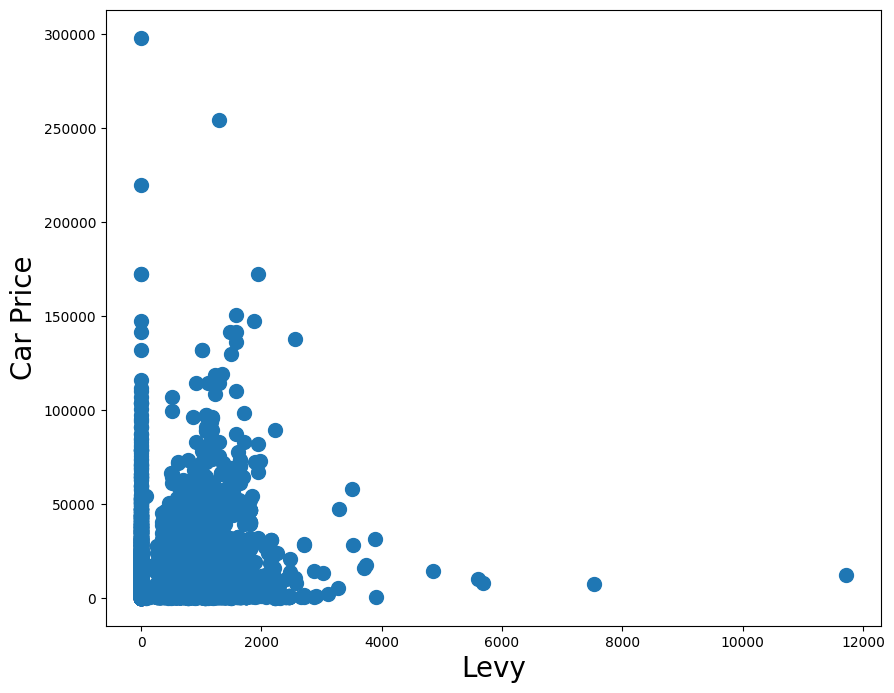

In [9]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Levy'], data['Price'], s=100)

plt.xlabel('Levy', fontsize=20)
plt.ylabel('Car Price', fontsize=20)
plt.show()

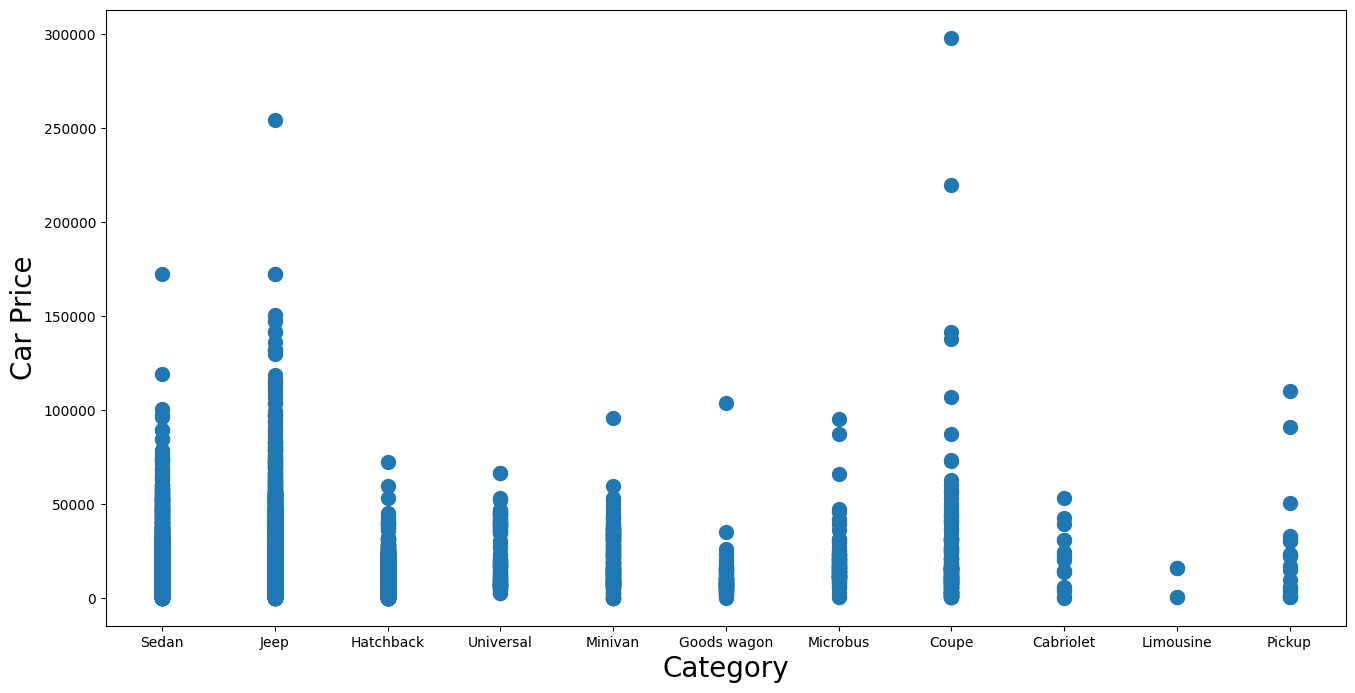

In [10]:
plt.figure(figsize=(16, 8))

plt.scatter(data['Category'], data['Price'], s=100)

plt.xlabel('Category', fontsize=20)
plt.ylabel('Car Price', fontsize=20)
plt.show()

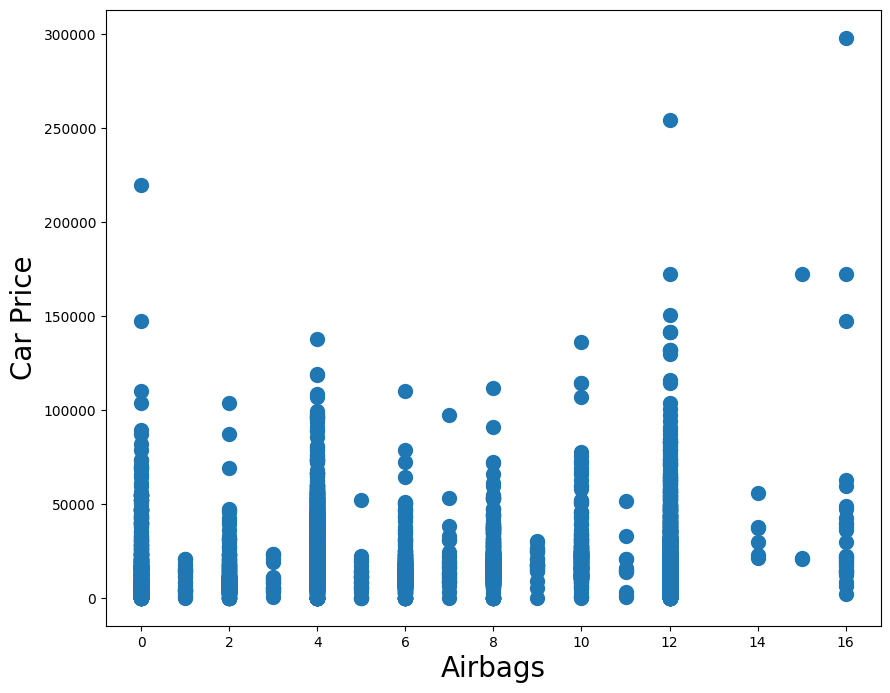

In [11]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Airbags'], data['Price'], s=100)

plt.xlabel('Airbags', fontsize=20)
plt.ylabel('Car Price', fontsize=20)
plt.show()

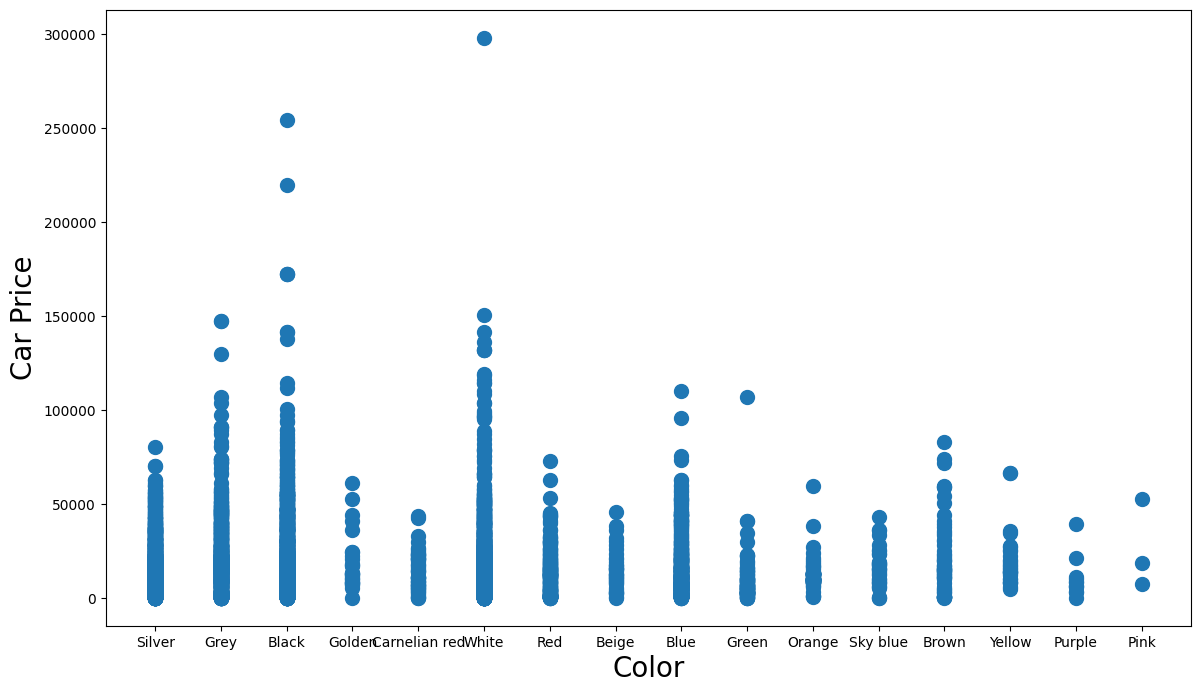

In [12]:
plt.figure(figsize=(14, 8))
plt.scatter(data['Color'], data['Price'], s=100)

plt.xlabel('Color', fontsize=20)
plt.ylabel('Car Price', fontsize=20)
plt.show()

In [13]:
features = data.drop('Price', axis=1)

target = data[['Price']]

In [14]:
features.sample(10)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
ID,,,,,,,,,,,,,,
45455842,781,TOYOTA,Camry,2012,Sedan,Yes,Hybrid,2.5,90000,4,Tiptronic,Front,Black,8
45748211,0,AUDI,Q5,2010,Jeep,Yes,Petrol,3.2,150000,6,Tiptronic,4x4,Silver,8
45186690,0,TOYOTA,Camry,2014,Sedan,Yes,Petrol,2.5,4000,6,Automatic,4x4,Black,6
45643535,640,FORD,Focus,2013,Sedan,Yes,Petrol,2.0,53000,4,Manual,Front,Yellow,8
45234323,0,BMW,X5,2004,Jeep,Yes,Diesel,3.0,246000,6,Tiptronic,4x4,Black,12
44537627,0,NISSAN,Tiida,2005,Hatchback,Yes,Petrol,1.5,146000,4,Automatic,Front,Black,7
45801527,583,HYUNDAI,Elantra,2011,Sedan,Yes,Petrol,1.6,150000,4,Automatic,Front,Black,4
45323823,777,TOYOTA,Camry,2014,Sedan,Yes,Petrol,2.5,105600,4,Tiptronic,Front,Grey,12
45767389,308,TOYOTA,Prius,2014,Jeep,Yes,Hybrid,1.8,187334,4,Automatic,Front,White,12


In [15]:
target.sample(10)

,Price
ID,
45732770,6429
45583433,25716
45815324,26657
45523519,3700
44684078,13799
45803379,9252
44728797,15053
45804273,18760
45782069,10976


In [16]:
categorical_features = features[['Manufacturer', 'Model', 'Category','Fuel type','Leather interior','Gear box type','Drive wheels','Color']].copy()

categorical_features.head()

,Manufacturer,Model,Category,Fuel type,Leather interior,Gear box type,Drive wheels,Color
ID,,,,,,,,
45801231,MERCEDES-BENZ,C 230,Sedan,Petrol,Yes,Tiptronic,Rear,Silver
45810496,CHEVROLET,Orlando,Jeep,Diesel,Yes,Automatic,Front,Grey
45776829,MERCEDES-BENZ,S 500,Sedan,Petrol,Yes,Tiptronic,Rear,Black
45810042,CHEVROLET,Impala,Sedan,Petrol,Yes,Automatic,Front,Silver
39691194,TOYOTA,Vitz,Sedan,Petrol,No,Automatic,Front,Silver


In [17]:
numeric_features = features.drop(categorical_features, axis=1)

numeric_features.head()

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
ID,,,,,,
45801231,0,2004,1.8,221000,4,10
45810496,831,2017,1.6,65124,4,4
45776829,0,2001,5.0,160000,8,0
45810042,1091,2016,2.5,73148,4,4
39691194,0,2002,1.3,100000,4,2


In [18]:
categorical_features.head()

,Manufacturer,Model,Category,Fuel type,Leather interior,Gear box type,Drive wheels,Color
ID,,,,,,,,
45801231,MERCEDES-BENZ,C 230,Sedan,Petrol,Yes,Tiptronic,Rear,Silver
45810496,CHEVROLET,Orlando,Jeep,Diesel,Yes,Automatic,Front,Grey
45776829,MERCEDES-BENZ,S 500,Sedan,Petrol,Yes,Tiptronic,Rear,Black
45810042,CHEVROLET,Impala,Sedan,Petrol,Yes,Automatic,Front,Silver
39691194,TOYOTA,Vitz,Sedan,Petrol,No,Automatic,Front,Silver


In [19]:
leatherint_dict = {'No':0, 'Yes':1}

categorical_features['Leather interior'].replace(leatherint_dict, inplace=True)

categorical_features.head()

,Manufacturer,Model,Category,Fuel type,Leather interior,Gear box type,Drive wheels,Color
ID,,,,,,,,
45801231,MERCEDES-BENZ,C 230,Sedan,Petrol,1,Tiptronic,Rear,Silver
45810496,CHEVROLET,Orlando,Jeep,Diesel,1,Automatic,Front,Grey
45776829,MERCEDES-BENZ,S 500,Sedan,Petrol,1,Tiptronic,Rear,Black
45810042,CHEVROLET,Impala,Sedan,Petrol,1,Automatic,Front,Silver
39691194,TOYOTA,Vitz,Sedan,Petrol,0,Automatic,Front,Silver


In [20]:
categorical_features = pd.get_dummies(categorical_features, columns=['Manufacturer'])

categorical_features.head()

,Model,Category,Fuel type,Leather interior,Gear box type,Drive wheels,Color,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,...,Manufacturer_SUBARU,Manufacturer_SUZUKI,Manufacturer_TESLA,Manufacturer_TOYOTA,Manufacturer_UAZ,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,Manufacturer_ZAZ,Manufacturer_სხვა
ID,,,,,,,,,,,,,,,,,,,,,
45801231,C 230,Sedan,Petrol,1,Tiptronic,Rear,Silver,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45810496,Orlando,Jeep,Diesel,1,Automatic,Front,Grey,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45776829,S 500,Sedan,Petrol,1,Tiptronic,Rear,Black,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45810042,Impala,Sedan,Petrol,1,Automatic,Front,Silver,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39691194,Vitz,Sedan,Petrol,0,Automatic,Front,Silver,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
categorical_features = pd.get_dummies(categorical_features, columns=['Model'])

categorical_features.head()

,Category,Fuel type,Leather interior,Gear box type,Drive wheels,Color,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BENTLEY,...,Model_XK,Model_XL7,Model_XV,Model_YRV,Model_Yaris,Model_Yaris RS,Model_Zafira,Model_i20,Model_macan,Model_tC
ID,,,,,,,,,,,,,,,,,,,,,
45801231,Sedan,Petrol,1,Tiptronic,Rear,Silver,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45810496,Jeep,Diesel,1,Automatic,Front,Grey,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45776829,Sedan,Petrol,1,Tiptronic,Rear,Black,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45810042,Sedan,Petrol,1,Automatic,Front,Silver,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39691194,Sedan,Petrol,0,Automatic,Front,Silver,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
categorical_features = pd.get_dummies(categorical_features, columns=['Category'])

categorical_features.head()

,Fuel type,Leather interior,Gear box type,Drive wheels,Color,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
ID,,,,,,,,,,,,,,,,,,,,,
45801231,Petrol,1,Tiptronic,Rear,Silver,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45810496,Diesel,1,Automatic,Front,Grey,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
45776829,Petrol,1,Tiptronic,Rear,Black,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45810042,Petrol,1,Automatic,Front,Silver,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39691194,Petrol,0,Automatic,Front,Silver,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
categorical_features = pd.get_dummies(categorical_features, columns=['Fuel type'])

categorical_features.head()

,Leather interior,Gear box type,Drive wheels,Color,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,...,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
ID,,,,,,,,,,,,,,,,,,,,,
45801231,1,Tiptronic,Rear,Silver,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
45810496,1,Automatic,Front,Grey,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45776829,1,Tiptronic,Rear,Black,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
45810042,1,Automatic,Front,Silver,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
39691194,0,Automatic,Front,Silver,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [24]:
categorical_features = pd.get_dummies(categorical_features, columns=['Gear box type'])

categorical_features.head()

,Leather interior,Drive wheels,Color,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,...,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
ID,,,,,,,,,,,,,,,,,,,,,
45801231,1,Rear,Silver,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45810496,1,Front,Grey,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
45776829,1,Rear,Black,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45810042,1,Front,Silver,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
39691194,0,Front,Silver,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [25]:
categorical_features = pd.get_dummies(categorical_features, columns=['Color'])

categorical_features.head()

,Leather interior,Drive wheels,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
ID,,,,,,,,,,,,,,,,,,,,,
45801231,1,Rear,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45810496,1,Front,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
45776829,1,Rear,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45810042,1,Front,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
39691194,0,Front,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
categorical_features = pd.get_dummies(categorical_features, columns=['Drive wheels'])

categorical_features.head()

,Leather interior,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,...,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear
ID,,,,,,,,,,,,,,,,,,,,,
45801231,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45810496,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
45776829,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45810042,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
39691194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [27]:
numeric_features.describe()

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000
mean,624.524500,2010.864667,2.301833,5.475008e+05,4.587333,6.587333
std,567.123249,5.879635,0.883880,1.951521e+07,1.218724,4.312440
min,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,0.000000,2009.000000,1.800000,7.100000e+04,4.000000,4.000000
50%,640.000000,2012.000000,2.000000,1.250000e+05,4.000000,5.000000
75%,915.000000,2015.000000,2.500000,1.881108e+05,4.000000,12.000000
max,11714.000000,2020.000000,20.000000,1.111111e+09,16.000000,16.000000


In [28]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,7.193783e-17,1.000714e-14,-3.091046e-17,-1.231827e-17,-3.481844e-16,1.265654e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-1.101307e+00,-1.222366e+01,-2.604455e+00,-2.805742e-02,-2.943762e+00,-1.527646e+00
25%,-1.101307e+00,-3.171663e-01,-5.678093e-01,-2.441893e-02,-4.819652e-01,-6.000197e-01
50%,2.728999e-02,1.931120e-01,-3.415153e-01,-2.165162e-02,-4.819652e-01,-3.681131e-01
75%,5.122338e-01,7.033902e-01,2.242196e-01,-1.841743e-02,-4.819652e-01,1.255233e+00
max,1.955554e+01,1.553854e+00,2.002494e+01,5.691233e+01,9.365223e+00,2.182860e+00


In [29]:
all_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

all_features.sample(20)

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Leather interior,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,...,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear
ID,,,,,,,,,,,,,,,,,,,,,
45766759,-1.101307,1.213668,0.224220,-0.027094,6.082827,1.255233,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45767337,0.755587,0.533297,1.355689,-0.021275,1.159233,1.255233,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45660975,1.034210,-0.147074,0.789955,-0.014466,1.159233,-1.527646,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45731777,0.704448,-0.147074,0.224220,-0.025539,-0.481965,-0.600020,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45757922,0.485782,0.703390,0.111073,-0.020354,-0.481965,1.255233,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
44762753,0.281224,1.043576,-0.907250,-0.025952,-0.481965,0.327607,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45729839,0.007892,0.703390,-0.794103,-0.022682,-0.481965,-0.600020,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45730129,0.185999,0.873483,-0.794103,-0.024815,-0.481965,-0.600020,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
45809508,0.027290,0.363205,-0.341515,-0.019346,-0.481965,-0.600020,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
cars_data = pd.concat([all_features, target], axis=1,
                            sort=False)

cars_data.head()

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Leather interior,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,...,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Price
ID,,,,,,,,,,,,,,,,,,,,,
45801231,-1.101307,-1.167630,-0.567809,-0.016732,-0.481965,0.791420,1,0,0,0,...,0,0,1,0,0,0,0,0,1,12231
45810496,0.364106,1.043576,-0.794103,-0.024720,-0.481965,-0.600020,1,0,0,0,...,0,0,0,0,0,0,0,1,0,36197
45776829,-1.101307,-1.677908,3.052894,-0.019858,2.800431,-1.527646,1,0,0,0,...,0,0,0,0,0,0,0,0,1,14113
45810042,0.822598,0.873483,0.224220,-0.024309,-0.481965,-0.600020,1,0,0,0,...,0,0,1,0,0,0,0,1,0,49058
39691194,-1.101307,-1.507815,-1.133544,-0.022933,-0.481965,-1.063833,0,0,0,0,...,0,0,1,0,0,0,0,1,0,60


In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cars_data, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [32]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [33]:
model_relu_64 = build_model()

model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                29888     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 32,065
Trainable params: 32,065
Non-trainable params: 0
_________________________________________________________________


In [34]:
n_epochs = 10

training_hist = model_relu_64.fit(x_train, 
                                  y_train,
                                  epochs = n_epochs, 
                                  validation_split = 0.2, 
                                  verbose = True)

Epoch 1/10
120/120 [==============================] - 2s 6ms/step - loss: 295415360.0000 - mae: 10756.1191 - mse: 295415360.0000 - val_loss: 33764.0117 - val_mae: 122.5112 - val_mse: 33764.0117
Epoch 2/10
120/120 [==============================] - 0s 4ms/step - loss: 106279.2422 - mae: 136.0154 - mse: 106279.2422 - val_loss: 41.6709 - val_mae: 4.3094 - val_mse: 41.6709
Epoch 3/10
120/120 [==============================] - 0s 4ms/step - loss: 24.6177 - mae: 4.2200 - mse: 24.6177 - val_loss: 24.5717 - val_mae: 3.9905 - val_mse: 24.5717
Epoch 4/10
120/120 [==============================] - 0s 4ms/step - loss: 23.9581 - mae: 4.1461 - mse: 23.9581 - val_loss: 23.9822 - val_mae: 4.0307 - val_mse: 23.9822
Epoch 5/10
120/120 [==============================] - 0s 4ms/step - loss: 23.8055 - mae: 4.1344 - mse: 23.8055 - val_loss: 25.7005 - val_mae: 3.9333 - val_mse: 25.7005
Epoch 6/10
120/120 [==============================] - 0s 4ms/step - loss: 23.6300 - mae: 4.1424 - mse: 23.6300 - val_loss: 2

In [34]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,9.862594,1.551038,9.862594,0.263437,0.390753,0.263437,95
96,7.796065,1.532371,7.796065,0.545432,0.553262,0.545432,96
97,15.098763,1.970338,15.098763,187.035812,9.293345,187.035812,97
98,6596.262695,24.709772,6596.262695,579999.250000,517.683167,579999.250000,98
99,50995.027344,87.810295,50995.027344,2.333577,1.173731,2.333577,99


In [1]:
y_trainpred = model_relu_64.predict(x_train).flatten()
r2_score(y_trainpred, x_train)

NameError: name 'model_relu_64' is not defined

In [36]:
y_pred = model_relu_64.predict(x_test).flatten()
r2_score(y_test, y_pred)

38/38 [==============================] - 0s 2ms/step


0.9999999942807528

In [37]:
test = y_test.copy()

In [38]:
predictions = pd.DataFrame(y_pred)
predictions.columns=['predictions']
predictions.index = test.index

In [39]:
test.head()

,Price
ID,
45801267,5331
45645309,8781
45765480,125
45718610,11917
45410118,90947


In [40]:
predictions.head()

,predictions
ID,
45801267,5329.329590
45645309,8781.725586
45765480,124.809372
45718610,11917.622070
45410118,90952.359375


In [41]:
result = pd.concat([predictions, y_test], axis=1)
result.columns = ['predicted value','actual value']

In [42]:
result

,predicted value,actual value
ID,,
45801267,5329.329590,5331
45645309,8781.725586,8781
45765480,124.809372,125
45718610,11917.622070,11917
45410118,90952.359375,90947
...,...,...
45730640,35270.875000,35269
45815241,3763.682861,3763
45801837,14834.747070,14834


In [44]:
result.to_csv('results.csv', index=True)